<a href="https://colab.research.google.com/github/carullahtursun/BMI-Calculator/blob/main/veri_bilimi_Odev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Çalışma verisini dahil ettık


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#kütüphaneleri import ettik

df = pd.read_csv('/content/veri data.csv') #veri setimizi ekledik
#print(dataset.count())
df.head() #veri on izleme yaptık

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


2. veriyi tanımak

In [ ]:
df.columns  
df.axes
#veri satır ve sutun kontrolleri

[RangeIndex(start=0, stop=541909, step=1),
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
        'UnitPrice', 'CustomerID', 'Country'],
       dtype='object')]

In [ ]:
df.shape
#verinın satır ve sutunu

(541909, 8)

In [ ]:
df.info()
#veri hakkında genel bilgi aldık / veri tipi kayıt sayısı ve her sutun sayıları 
#verimişzde bir bozulma görmediğimiz için devam ettik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe().T
#verideki genel ozel bilgileri aldık merkezi eğilim, merkezden dağılım 
#ölçüleri, 5 sayı özetleri vb.

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [ ]:
df.tail(44)  
#sondan kaç tane gösterilmesini istiyorsak, parantez   içine yazabiliriz.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,12/9/2011 12:23,1.85,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,13777.0,United Kingdom
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,12/9/2011 12:25,1.85,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom
541870,581585,22915,ASSORTED BOTTLE TOP MAGNETS,24,12/9/2011 12:31,0.19,15804.0,United Kingdom
541871,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541872,581585,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,12/9/2011 12:31,1.25,15804.0,United Kingdom
541873,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/2011 12:31,0.85,15804.0,United Kingdom
541874,581585,23084,RABBIT NIGHT LIGHT,12,12/9/2011 12:31,2.08,15804.0,United Kingdom


In [ ]:
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Country=df['Country'].value_counts() # kullanıcıların ait olduğu ulke sayısı
Country


United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

3. Verinin görselleştirilerek ayrıntılı analizinin yapılması

---


   bu adımda veri yi görselleştirme işlemleri yapiyoruz

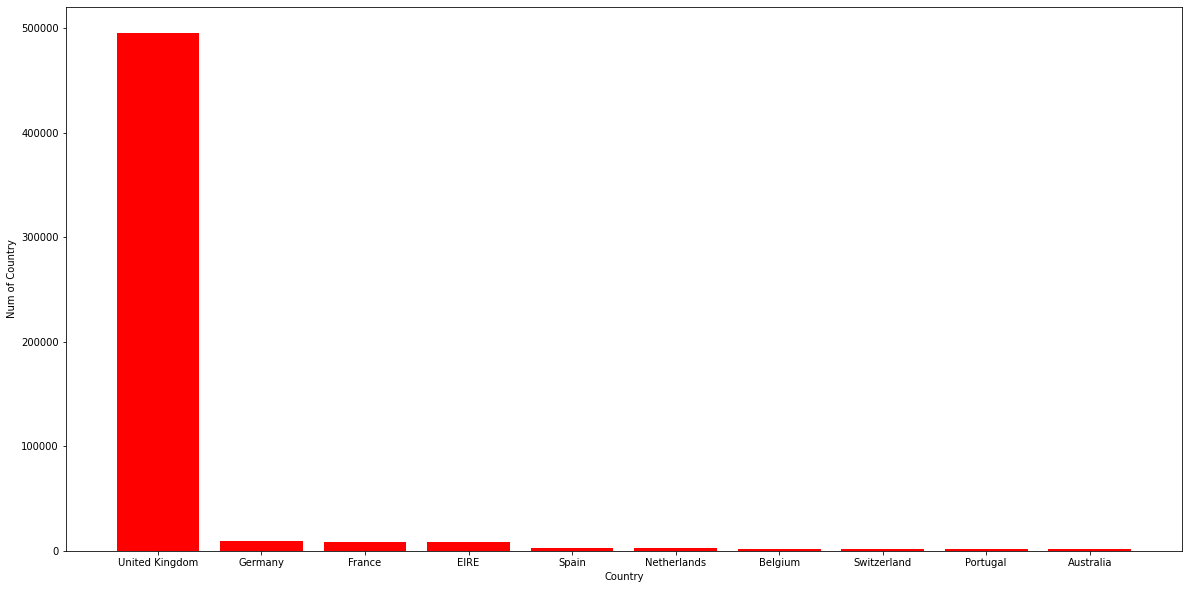

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.bar(Country[:10].index,Country[:10].values,color='red')
plt.ylabel('Num of Country')
plt.xlabel('Country')
plt.show()
#ulkelere sayısına gore dağılım girafiği yaptık ve bu veri setinde en çok stok bulunduran UK olduğunu anladık

In [ ]:
sales=df.groupby('Country')['UnitPrice'].sum().sort_values(ascending =False)
sal_10=sales[:10]
sal_10
#ulkelere gore stok fıyatlarının toplamını aldık

Country
United Kingdom    2245715.474
EIRE                48447.190
France              43031.990
Germany             37666.000
Singapore           25108.890
Portugal            13037.540
Spain               12633.450
Hong Kong           12241.500
Belgium              7540.130
Switzerland          6813.690
Name: UnitPrice, dtype: float64

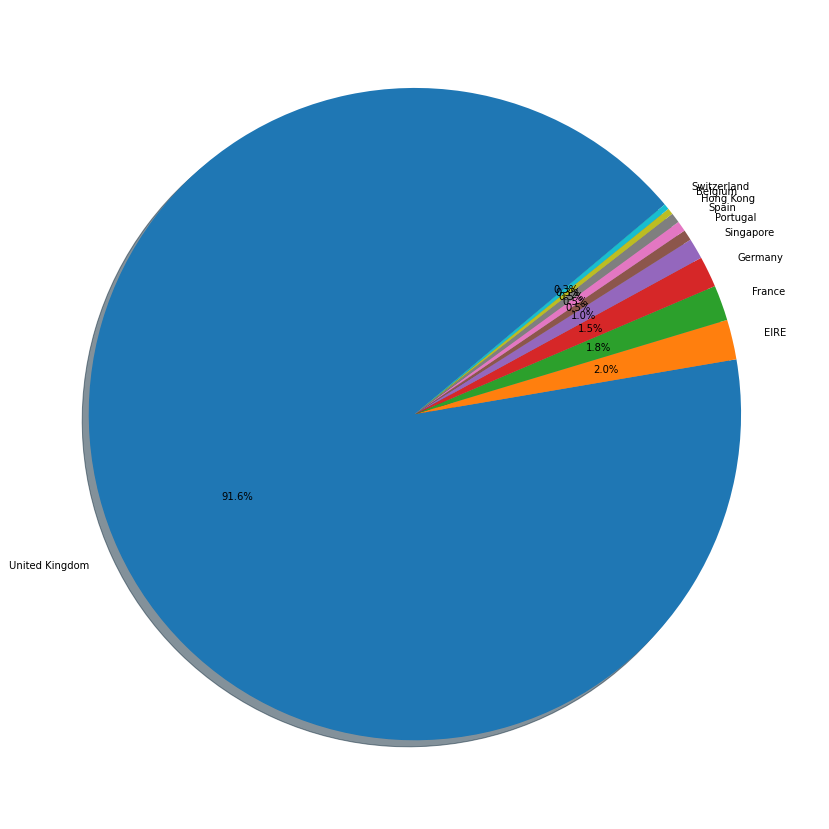

In [ ]:
plt.figure(figsize=(20,15))
plt.pie(sal_10,startangle=40,autopct='%1.1f%%',shadow=True,labels=sal_10.index)
plt.show()
#buna gore stokların %91 oranında UK ye ait olduğunu oğrendık

In [ ]:
df.StockCode.value_counts() 

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [ ]:
df[df.StockCode=='85099B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 9:57,1.65,16029.0,United Kingdom
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/1/2010 10:19,1.65,17511.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/1/2010 11:45,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:23,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/1/2010 12:49,1.95,15012.0,United Kingdom
...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,12/8/2011 14:38,2.08,14415.0,United Kingdom
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,12/8/2011 15:23,2.08,15898.0,United Kingdom
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,12/8/2011 16:30,4.13,NaN,United Kingdom
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/9/2011 9:38,2.08,17001.0,United Kingdom


In [ ]:
''' def change_name(cols):
    x = cols[2]
    y = cols[:-1]
    if x!='85099B':
        return x
    else:
        if y == "Germany":
            return 'stock_a'
        else:
            return 'stock_b' '''

' def change_name(cols):\n    x = cols[2]\n    y = cols[:-1]\n    if x!=\'85099B\':\n        return x\n    else:\n        if y == "Germany":\n            return \'stock_a\'\n        else:\n            return \'stock_b\' '

In [ ]:
''' df['StockCode'] = df[['StockCode','Country']].apply(change_name,axis=1)
df[(df['StockCode'] =='stock_a') | (df['StockCode'] == 'stock_b')] '''

" df['StockCode'] = df[['StockCode','Country']].apply(change_name,axis=1)\ndf[(df['StockCode'] =='stock_a') | (df['StockCode'] == 'stock_b')] "

In [ ]:
sales = df.groupby(['CustomerID','InvoiceNo'])['UnitPrice'].sum().sort_values(ascending =False)
sales

CustomerID  InvoiceNo
15098.0     C556445      38970.00
16029.0     C551685       8142.75
            551697        8142.75
            C551699       6930.00
12744.0     C571750       6068.06
                           ...   
16422.0     C545478          0.01
17560.0     543599           0.00
14646.0     564651           0.00
13256.0     578841           0.00
12748.0     568384           0.00
Name: UnitPrice, Length: 22190, dtype: float64

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


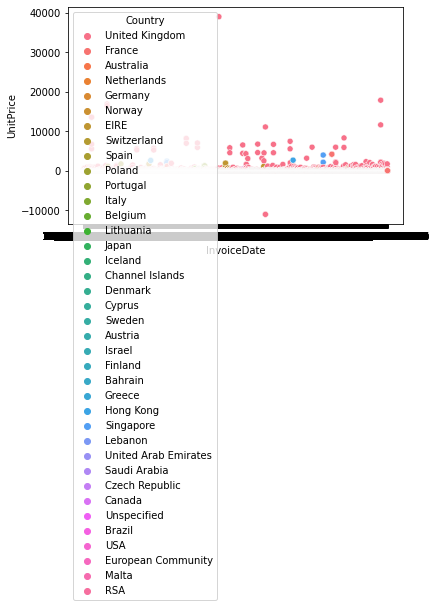

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="InvoiceDate", y="UnitPrice", hue="Country")

#birim maliyetin tarıh bakımından ulkelere göre sınıflandırılması

In [ ]:

     
import seaborn as sns
sns.scatterplot(data=df, x="Quantity", y="StockCode", hue="InvoiceDate")

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: ignored

<Figure size 432x288 with 1 Axes>

**4. Veri seti üzerinde veri ön-işleme çalışması yapılması**

---

Eksik veri tamamlama, Aykırı, sapan veri giderme, ayrıklaştırma, ikilileştirme,
düzleştirme işlemleri yapılacaktır





In [ ]:
# toplam eksik veri sayısını bulduk 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.notnull().sum()
#toplameksis olmayan veri sayısını bulduk

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [ ]:
df.isnull().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [ ]:

#satırdakı eksik verileri sildik
df1 = df.dropna()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Sütun bazında eksik veriye sahip  kayıtları sil
df2 = df.dropna(axis=1)
df2


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


In [ ]:
 #eksik veriye sahıp tek kaydı sildik
df3 = df.drop("CustomerID",axis=1)
df3


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,France


In [ ]:
 #eksik veriye sahıp tek kaydı sildik
df4 = df3.drop("Description",axis=1)
df4

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


In [ ]:
#silme işlemlerini kalıcı olarak kaydettık
df3.dropna(inplace=True)
df4.dropna(inplace=True)
df3
df4

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


In [ ]:
#Tek bir niteliğin eksik verilerini ortalama ile tamamla
df["CustomerID"].fillna(df["CustomerID"].mean())


0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [ ]:
#Nümerik niteliklerin eksik verilerini ortalama değerleri ile tamamla
df.fillna(df.mean(numeric_only=True))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#Bir niteliği başka bir niteliğe göre gruplandırıp ortalama ile tamamladık
df["CustomerID"]=df["CustomerID"].fillna(df.groupby("Quantity")["CustomerID"].mean())

In [ ]:
#Kategorik bir değişkenin eksik verilerini tamamladık
df["Quantity"].fillna(df["Quantity"].mode()[0])

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 541909, dtype: int64

In [ ]:
df["Quantity"].mode()[0]

1

##aykırı veri tespiti

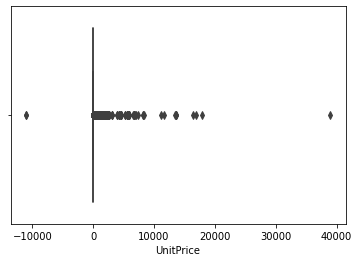

In [ ]:
import seaborn as sns
df_table = df["UnitPrice"].copy() 
sns.boxplot(x = df_table)

In [ ]:
new_df=df.drop(columns=['Description'],axis=1)
new_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
Q1 = df_table.quantile(0.25)
Q2 = df_table.quantile(0.5)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1    
# Çeyreklik Açıklığı 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 
print("Alt Sınır Değeri : " + str(lower_bound)) 
print("Üst Sınır Değeri : " + str(upper_bound)) 
print("1. Çeyrek : " + str(Q1)) 
print("2. Çeyrek : " + str(Q2))
print("3. Çeyrek : "+ str(Q3)) 


Alt Sınır Değeri : -3.0700000000000003
Üst Sınır Değeri : 8.45
1. Çeyrek : 1.25
2. Çeyrek : 2.08
3. Çeyrek : 4.13


In [ ]:
# Bu değerler bir diziye atıyoruz
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound) ) 
outliers_vector 

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: UnitPrice, Length: 541909, dtype: bool

In [ ]:
clean_df_table = df_table[~((df_table<(lower_bound)) | (df_table > (upper_bound)))] 
clean_df_table.shape

(502282,)

## Veri Düzleştirme (KBinsDiscretizer)

In [ ]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
Y = df.UnitPrice.values.reshape(-1,1)
Y

array([[2.55],
       [3.39],
       [2.75],
       ...,
       [4.15],
       [4.15],
       [4.95]])

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
Xbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

In [ ]:
Xbin.fit(Y)

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [ ]:
Xbin.transform(Y).T

array([[0., 0., 0., ..., 0., 0., 0.]])

##5. Veri setinin birliktelik kuralları analizinin yapılması



In [ ]:
#Veri setinin üzerinde daha kolay çalışabilmek için fatura numarası olmayan ve kredi kartı ile yapılmış alışveriş verilerini veri setimizden çıkaralım.

# Aprioi algoritma için veri seti formatının değiştirilmesi 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)

Apriori Analizi Kuralları

Veri seti tabular veya transactional yapıda olmalıdır
Veriler kategorik olmalıdır.
Verideki değişkenlerin yönleri in,out veya both olarak tanımlanmalıdır.

In [ ]:
# Quantity ve Price değişkenleri için 0'dan büyük değerleri alıyoruz.
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

In [ ]:
#Sayısal ve Aynı Zamanda Kategorik olmayan Değişkenleri Yakalıyoruz
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]
num_cols

['Quantity', 'UnitPrice', 'CustomerID']

In [ ]:
# Eşiklerle Değiştir
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > up_limit), col] = up_limit
    if df[df[col] > up_limit].any(axis=None):
        print(col,"YES",(low_limit,up_limit))
    elif df[df[col] < low_limit].any(axis=None):
        print(col,"YES",(low_limit,up_limit))
    else: 
        print(col,"NO",(low_limit,up_limit))

Quantity NO (-12.5, 23.5)
UnitPrice NO (-3.0700000000000003, 8.45)
CustomerID NO (9730.0, 21034.0)


ARL Veri Yapısını Hazırlama 

In [ ]:
# Germany müşterileri üzerinden birliktelik kuralları üreteceğiz.
df_gr = df[df['Country'] == "Germany"]

In [ ]:
# HANGİ ÜRÜNDEN KAÇ TANE ALINMIŞ?
df_gr.groupby(['InvoiceDate', 'Description']).agg({"Quantity": "sum"}).head(20)

Quantity
InvoiceDate     Description                              
1/10/2011 10:35 BOTTLE BAG RETROSPOT                 20.0
                BOX OF 24 COCKTAIL PARASOLS          23.5
                CABIN BAG VINTAGE RETROSPOT           3.0
                CAKES AND BOWS GIFT  TAPE            23.5
                CLOTHES PEGS RETROSPOT PACK 24       12.0
                FELT FARM ANIMAL WHITE BUNNY         23.5
                LUNCH BAG CARS BLUE                  10.0
                LUNCH BAG RED RETROSPOT              20.0
                LUNCH BAG SUKI  DESIGN               20.0
                LUNCH BAG WOODLAND                   20.0
                MINI FUNKY DESIGN TAPES              20.0
                POSTAGE                               3.0
                RED RETROSPOT TAPE                   23.5
                SKULLS TAPE                          23.5
                STARS GIFT TAPE                      23.5
                WALL TIDY RETROSPOT                  20.0
1/10/2011 9:48  DOORMAT AIRMAIL                       2.0
                EASTER TIN CHICKS IN GARDEN          23.5
                EASTER TIN KEEPSAKE                  23.5
                PACK OF 6 BIRDY GIFT TAGS            23.5

In [ ]:
# Veri setini istediğimiz forma dövüştürüyoruz. Unstack fonksiyonu parametrelerini kullanarak NA değerleri 
df_gr.groupby(['InvoiceDate', 'Description']).agg({"Quantity": "sum"}).unstack(fill_value= "0").iloc[0:5, 0:5]

Quantity                     \
Description      50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
InvoiceDate                                                         
1/10/2011 10:35                              0                  0   
1/10/2011 9:48                               0                  0   
1/11/2011 10:38                              0                  0   
1/12/2011 11:46                              0                  0   
1/13/2011 13:21                              0                  0   

                                                                       \
Description      I LOVE LONDON MINI BACKPACK  RED SPOT GIFT BAG LARGE   
InvoiceDate                                                             
1/10/2011 10:35                            0                        0   
1/10/2011 9:48                             0                        0   
1/11/2011 10:38                            0                        0   
1/12/2011 11:46                            0                        0   
1/13/2011 13:21                            0                        0   

                                                  
Description      SET 2 TEA TOWELS I LOVE LONDON   
InvoiceDate                                       
1/10/2011 10:35                                0  
1/10/2011 9:48                                 0  
1/11/2011 10:38                                0  
1/12/2011 11:46                                0  
1/13/2011 13:21                                0

In [ ]:
# Post barındıran ifadeler posta ücretleridir. Bunlarla ilgili işlem yapmayacağımız için veri setinden çıkaracağız.
df_gr[df_gr["StockCode"] == "POST"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1123,536527,POST,POSTAGE,1.0,12/1/2010 13:04,8.45,12662.0,Germany
5073,536840,POST,POSTAGE,1.0,12/2/2010 18:27,8.45,12738.0,Germany
5369,536861,POST,POSTAGE,3.0,12/3/2010 10:44,8.45,12427.0,Germany
6602,536967,POST,POSTAGE,1.0,12/3/2010 12:57,8.45,12600.0,Germany
6973,536983,POST,POSTAGE,1.0,12/3/2010 14:30,8.45,12712.0,Germany
...,...,...,...,...,...,...,...,...
537459,581266,POST,POSTAGE,5.0,12/8/2011 11:25,8.45,12621.0,Germany
541216,581494,POST,POSTAGE,2.0,12/9/2011 10:13,8.45,12518.0,Germany
541730,581570,POST,POSTAGE,1.0,12/9/2011 11:59,8.45,12662.0,Germany
541767,581574,POST,POSTAGE,2.0,12/9/2011 12:09,8.45,12526.0,Germany


In [ ]:
# Post barındıran ifadeleri çıkartıyoruz.
df_gr = df_gr[~df_gr["StockCode"].str.contains("POST", na=False)]

In [ ]:
# Post ifadeleri kontrol edelim.
df_gr[df_gr["StockCode"] == "POST"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# Invoice değerlerimizi sepet StockCode değerlerimizi sepetimizde ki ürünler olarak değerlerdirebileceğimiz formata çeviriyoruz.
gr_inv_pro_df = df_gr.groupby(['InvoiceDate', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

gr_inv_pro_df.head()

StockCode,10002,10125,10135,11001,15034,15036,15039,15044A,15044B,15044D,...,90161D,90170,90173,90201A,90201B,90201C,90201D,90202D,90204,M
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
1/10/2011 10:35,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/10/2011 9:48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/11/2011 10:38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/12/2011 11:46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/13/2011 13:21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# SUPPORT DEĞERLERİNİ ELDE ETME

# Tüm olası ürün birlikteliklerinin olasılıkları için aprioriyi kullanıyoruz
# Min support bizim belirlediğimiz threshold değeri
# use_colnames: Sütun isimlerini kullan diyoruz ama bize ürünlerin idleri gelcek
frequent_itemsets = apriori(gr_inv_pro_df, min_support=0.01, use_colnames=True)

In [ ]:
# DİĞER BÜTÜN METRİKLERİ HESAPLIYORUZ
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.sort_values("support", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2112,(22328),(22326),0.162162,0.252252,0.135135,0.833333,3.303571,0.094229,4.486486
2113,(22326),(22328),0.252252,0.162162,0.135135,0.535714,3.303571,0.094229,1.804574
2165,(22326),(22554),0.252252,0.141892,0.076577,0.303571,2.139456,0.040784,1.232155
2164,(22554),(22326),0.141892,0.252252,0.076577,0.539683,2.139456,0.040784,1.624418
2183,(22326),(22629),0.252252,0.105856,0.072072,0.285714,2.699088,0.045370,1.251802


In [ ]:
sorted_rules = rules.sort_values("lift", ascending=False)
rules.sort_values("lift", ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16865,"(21988, 21094, 21086)","(21989, 21987)",0.011261,0.011261,0.011261,1.0,88.8,0.011134,inf
13028,"(21988, 21987)","(21989, 21086)",0.011261,0.011261,0.011261,1.0,88.8,0.011134,inf
16863,"(21989, 21094, 21987)","(21988, 21086)",0.011261,0.011261,0.011261,1.0,88.8,0.011134,inf
16878,"(21988, 21987)","(21989, 21094, 21086)",0.011261,0.011261,0.011261,1.0,88.8,0.011134,inf
16874,"(21988, 21086)","(21989, 21094, 21987)",0.011261,0.011261,0.011261,1.0,88.8,0.011134,inf


In [ ]:
# ÜRÜN ÖNERME

product_id = 21576

recommendation_list = []

for i, product in enumerate(sorted_rules["antecedents"]):
    for j in list(product):
        if j == product_id:
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])
            
# Önerilen ilk 2 ürün 
recommendation_list[0:4]

[]

In [ ]:
# Önerilen ürünlerin isimleri nelerdir ? 
for name in recommendation_list[0:4]:
    product_name = df[df["StockCode"] == name][["Description"]].values[0].tolist()
    print(product_name)